<a href="https://colab.research.google.com/github/hstewari/Quantum-Computing/blob/main/Qiskit_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installing qiskit_textbook package

!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-clqxq0dj
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-clqxq0dj
     |████████████████████████████████| 6.0MB 13.9MB/s 
     |████████████████████████████████| 18.0MB 181kB/s 
     |████████████████████████████████| 235kB 67.1MB/s 
     |████████████████████████████████| 215kB 58.1MB/s 
     |████████████████████████████████| 2.1MB 46.2MB/s 
     |████████████████████████████████| 1.5MB 43.2MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 194kB 55.8MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 614kB 52.4MB/s 
     |████████████████████████████████| 3.2MB 46.4MB/s 
     |████████████████████████████████| 6.3MB 37.4MB/s 
  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-cp37-none-any.whl size=16956 sha256=2d42c2b834e5f5e6

In [2]:
circuit_drawer = 'mpl'

In [3]:
import qiskit.tools.jupyter
%qiskit_version_table

In [4]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [5]:
from qiskit_textbook.widgets import  binary_widget
binary_widget(nbits = 5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

***First Quantum Circuit***

In [6]:
n = 8
n_q = n # number of qubits in the circuit
n_b = n # number of output bits extract from the circuit at the end
qc_output = QuantumCircuit(n_q,n_b) # circuit

In [7]:
for j in range(n):
  qc_output.measure(j,j)

In [8]:
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

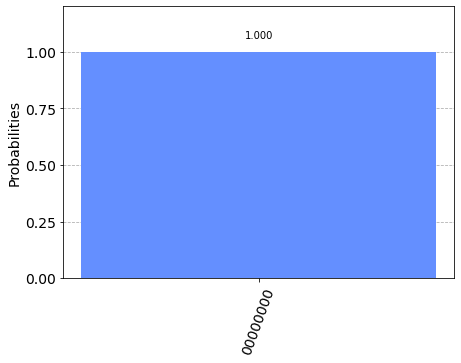

In [9]:
sim = Aer.get_backend('aer_simulator') # simulator to be used
qobj = assemble(qc_output) # turns the circuit to object our backend can run
result = sim.run(qobj).result() # run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# display in a histogram
plot_histogram(counts)

***Creating an Adder Circuit***

**Create a NOT gate**

In [10]:
qc_encode = QuantumCircuit(n) # create a new cicuit to do the job of encoding
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [11]:
qc = qc_encode + qc_output
qc.draw()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/qiskit/circuit/quantumcircuit.py:869: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


┌─┐                     
q_0: ─────┤M├─────────────────────
          └╥┘┌─┐                  
q_1: ──────╫─┤M├──────────────────
           ║ └╥┘┌─┐               
q_2: ──────╫──╫─┤M├───────────────
           ║  ║ └╥┘┌─┐            
q_3: ──────╫──╫──╫─┤M├────────────
           ║  ║  ║ └╥┘┌─┐         
q_4: ──────╫──╫──╫──╫─┤M├─────────
           ║  ║  ║  ║ └╥┘┌─┐      
q_5: ──────╫──╫──╫──╫──╫─┤M├──────
           ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ──────╫──╫──╫──╫──╫──╫─┤M├───
     ┌───┐ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/══════╩══╩══╩══╩══╩══╩══╩══╩═
           0  1  2  3  4  5  6  7

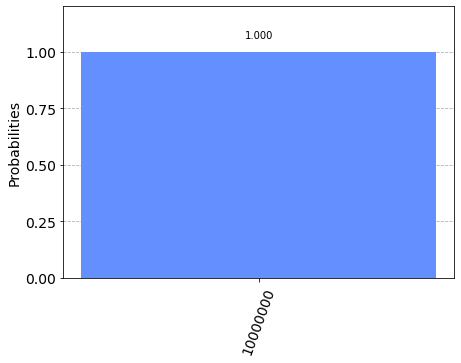

In [12]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [13]:
qc_encode = QuantumCircuit(n)
qc_encode.x(3)
qc_encode.x(7)

qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [14]:
qc = qc_encode + qc_output
qc.draw()

┌─┐                     
q_0: ─────┤M├─────────────────────
          └╥┘┌─┐                  
q_1: ──────╫─┤M├──────────────────
           ║ └╥┘┌─┐               
q_2: ──────╫──╫─┤M├───────────────
     ┌───┐ ║  ║ └╥┘         ┌─┐   
q_3: ┤ X ├─╫──╫──╫──────────┤M├───
     └───┘ ║  ║  ║ ┌─┐      └╥┘   
q_4: ──────╫──╫──╫─┤M├───────╫────
           ║  ║  ║ └╥┘┌─┐    ║    
q_5: ──────╫──╫──╫──╫─┤M├────╫────
           ║  ║  ║  ║ └╥┘┌─┐ ║    
q_6: ──────╫──╫──╫──╫──╫─┤M├─╫────
     ┌───┐ ║  ║  ║  ║  ║ └╥┘ ║ ┌─┐
q_7: ┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/══════╩══╩══╩══╩══╩══╩══╩══╩═
           0  1  2  4  5  6  3  7

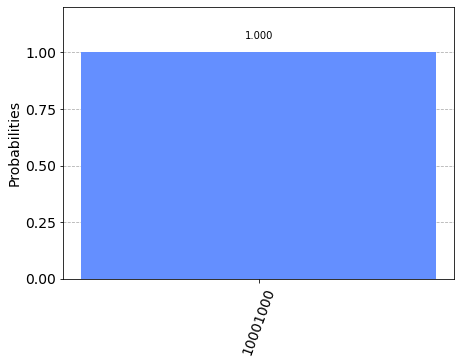

In [15]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [16]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [17]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

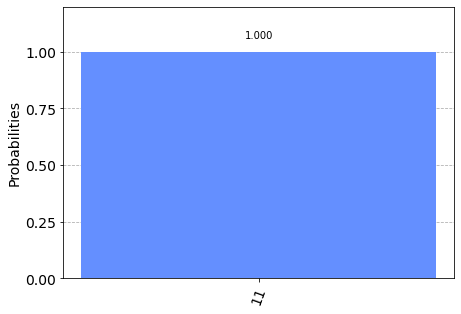

In [18]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [19]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

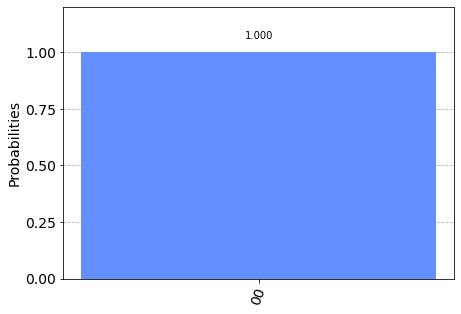

In [20]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)